### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Problems

Use the prompts below to get started with your data analysis.  

### 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum(), data.shape

(destination                 0
 passanger                   0
 weather                     0
 temperature                 0
 time                        0
 coupon                      0
 expiration                  0
 gender                      0
 age                         0
 maritalStatus               0
 has_children                0
 education                   0
 occupation                  0
 income                      0
 car                     12576
 Bar                       107
 CoffeeHouse               217
 CarryAway                 151
 RestaurantLessThan20      130
 Restaurant20To50          189
 toCoupon_GEQ5min            0
 toCoupon_GEQ15min           0
 toCoupon_GEQ25min           0
 direction_same              0
 direction_opp               0
 Y                           0
 dtype: int64,
 (12684, 26))

### 3. Decide what to do about your missing data -- drop, replace, other...

We can drop car since it's irrelevant to the work we have here:

In [5]:
df = data.drop('car', axis=1)

Next, since the rest of the missing data is on a lower scale amount in reference to the shape of the data, let's check how much we really lose by dropping it:

In [6]:
print(df.shape[0] - df.dropna().shape[0])
print()

605



So we lose about 605 rows. But we still have ~12000 remaining so we can work with this:

In [7]:
df = df.dropna().reset_index(drop=True)
df['Was Coupon Used'] = df['Y'].apply(lambda x: "yes" if x == 1 else "no")
print(df.shape)
df.head()

(12079, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,yes
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,no
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,yes
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,no


### 4. What proportion of the total observations chose to accept the coupon?



In [8]:
df['Y'].value_counts(normalize=True)

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64

### 5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Type of Coupon')

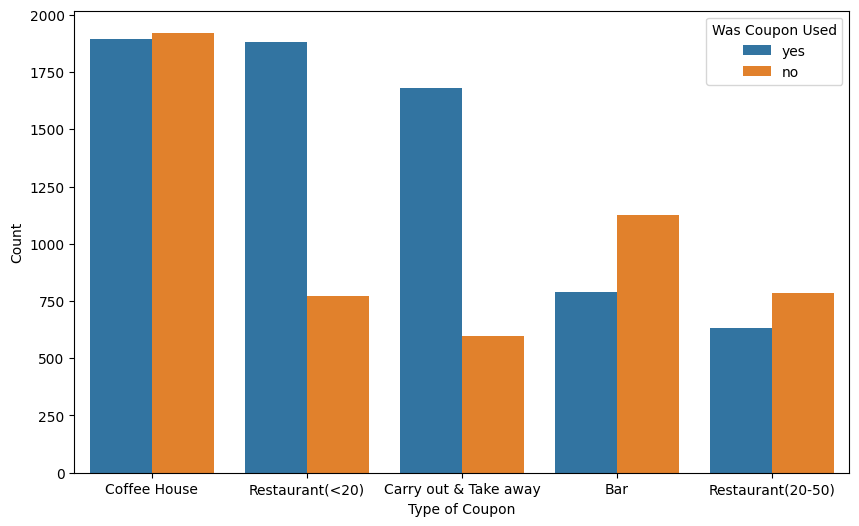

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=df, hue='Was Coupon Used', 
              order=["Coffee House", "Restaurant(<20)", "Carry out & Take away", "Bar", "Restaurant(20-50)"])
plt.ylabel('Count')
plt.xlabel('Type of Coupon')

Text(0.5, 0, 'Temperature')

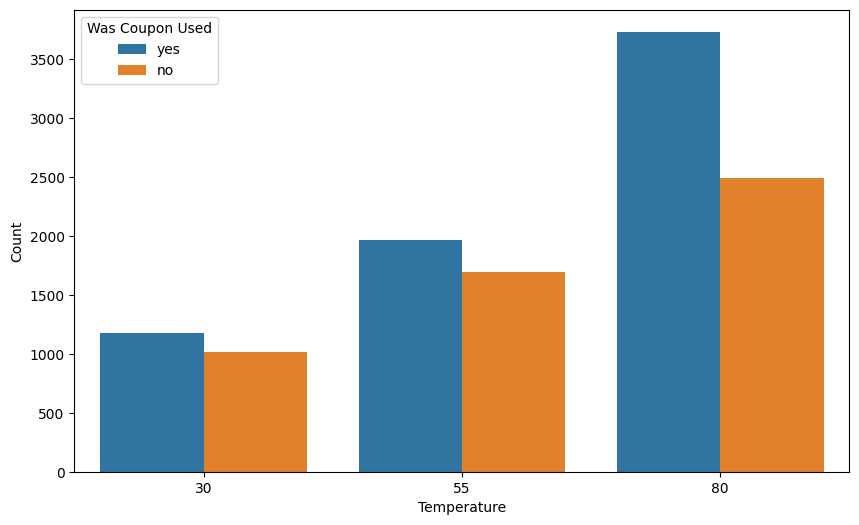

In [10]:
# Coupon usage based on Temperature

plt.figure(figsize=(10, 6))
sns.countplot(x='temperature', data=df, hue='Was Coupon Used')
plt.ylabel('Count')
plt.xlabel('Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
bar_only = df.loc[df['coupon'] == 'Bar'].reset_index(drop = True)
bar_only.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
0,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,yes
1,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,yes
2,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,yes
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,no
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,no


### 2. What proportion of bar coupons were accepted?


In [12]:
bar_only['Y'].value_counts(normalize=True)

Y
0    0.588082
1    0.411918
Name: proportion, dtype: float64

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0, 0.5, 'Count')

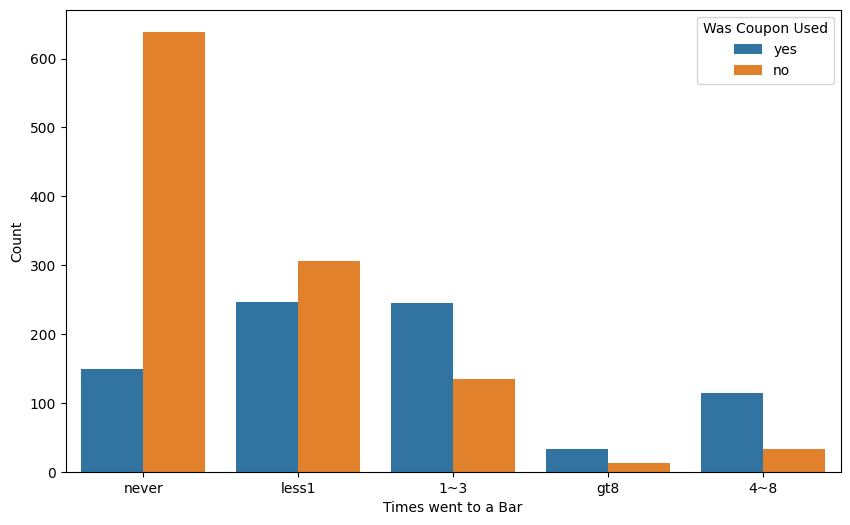

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Bar', data=bar_only, hue='Was Coupon Used')
plt.xlabel('Times went to a Bar')
plt.ylabel('Count')

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


(0.0, 1.0)

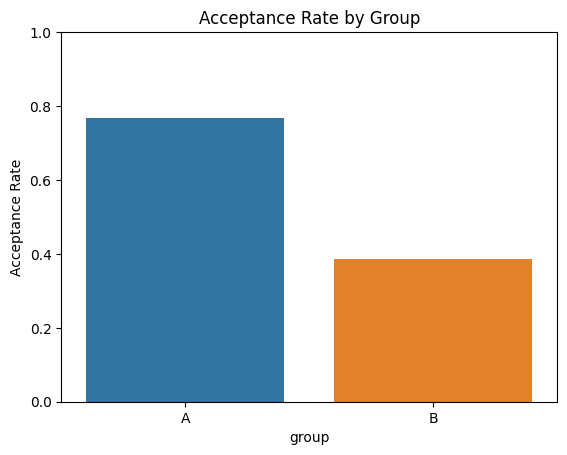

In [14]:
def group_a_checker(x):
    if (x['Bar'] in (['gt8', '4~8'])) & (
    x['age'] in (['46', '26', '31', '41', '50plus', '36'])):
        return "A"
    else:
        return "B"
bar_only['group'] = bar_only.apply(group_a_checker, axis=1)
grouper = bar_only.groupby('group')[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


(0.0, 1.0)

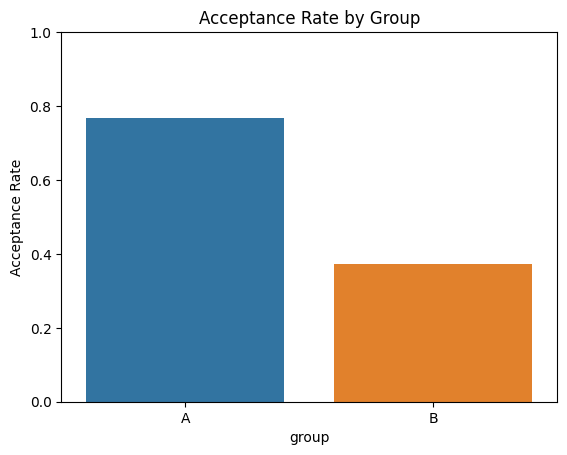

In [15]:
def group_a_checker(x):
    if (x['Bar'] in ['gt8', '4~8']) & (
    x['passanger'] != "Kid(s)") & (
    x['occupation'] not in ['Farming Fishing & Forestry']):
        return "A"
    else:
        return "B"
bar_only['group'] = bar_only.apply(group_a_checker, axis=1)
grouper = bar_only.groupby('group')[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



(0.0, 1.0)

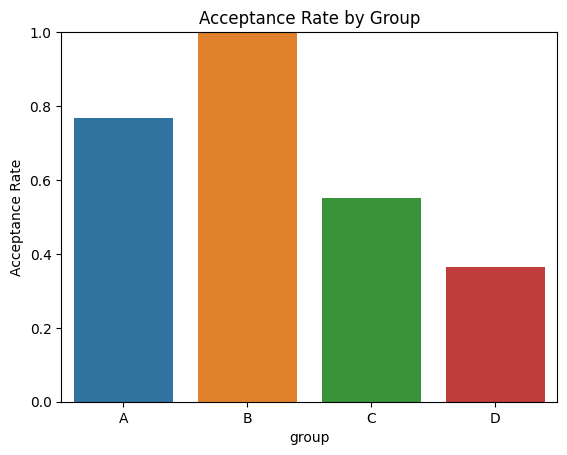

In [16]:
def group_a_checker(x):
    if (x['Bar'] in ['gt8', '4~8']) & (
    x['passanger'] != "Kid(s)") & (
    x['maritalStatus'] != "Widowed"):
        return "A"
    elif (x['Bar'] in ['gt8', '4~8']) & (
    x['age'] in ['below21', '21', '26']):
        return "B"
    elif (x['income'] in ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']) & (
    x['RestaurantLessThan20'] in ['gt8']):
        return "C"
    else:
        return "D"
bar_only['group'] = bar_only.apply(group_a_checker, axis=1)
grouper = bar_only.groupby('group')[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The biggest prediction rating is found on group B, which mainly contained of younger people (below age 30) who
also frequently went to the bar. This lets us believe that age and bar visit frequency is a major factor towards
bar coupon usage (which is to be expected.) Based on group A, it seems marriage status of not being widowed along
with not having any children as passengers at the time are also factors towards coupon usage, which makes sense 
for the latter though the former can be an interesting study as to why widowed adults drink less.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Exploring Take-Out Coupon Usage:

First we'll need to sort the data to only take out coupons:

In [17]:
take_out_only = df[df["coupon"] == "Carry out & Take away"].reset_index(drop=True)
take_out_only.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
0,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
1,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,1,yes
2,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,yes
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,yes
4,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,yes


We'll also get the proportion rates of coupon used or not:

In [64]:
take_out_only['Was Coupon Used'].value_counts(normalize=True)

Was Coupon Used
yes    0.737719
no     0.262281
Name: proportion, dtype: float64

I decided to explore on time first to see any possible relationship in prediction:

(0.0, 1.0)

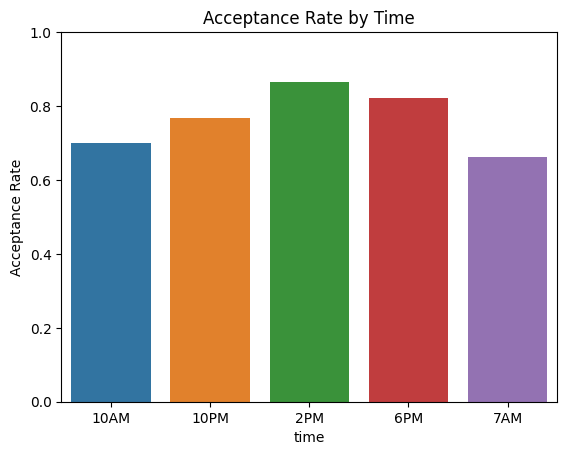

In [19]:
grouper = take_out_only.groupby(['time'])[['Y']].mean().reset_index()
sns.barplot(x='time', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Time")
plt.ylim(0, 1)

I found that there were higher acceptance rates for times that were more in the later of the day so I decided I would start my group filtering there.



Next I focused on education:

(0.0, 1.0)

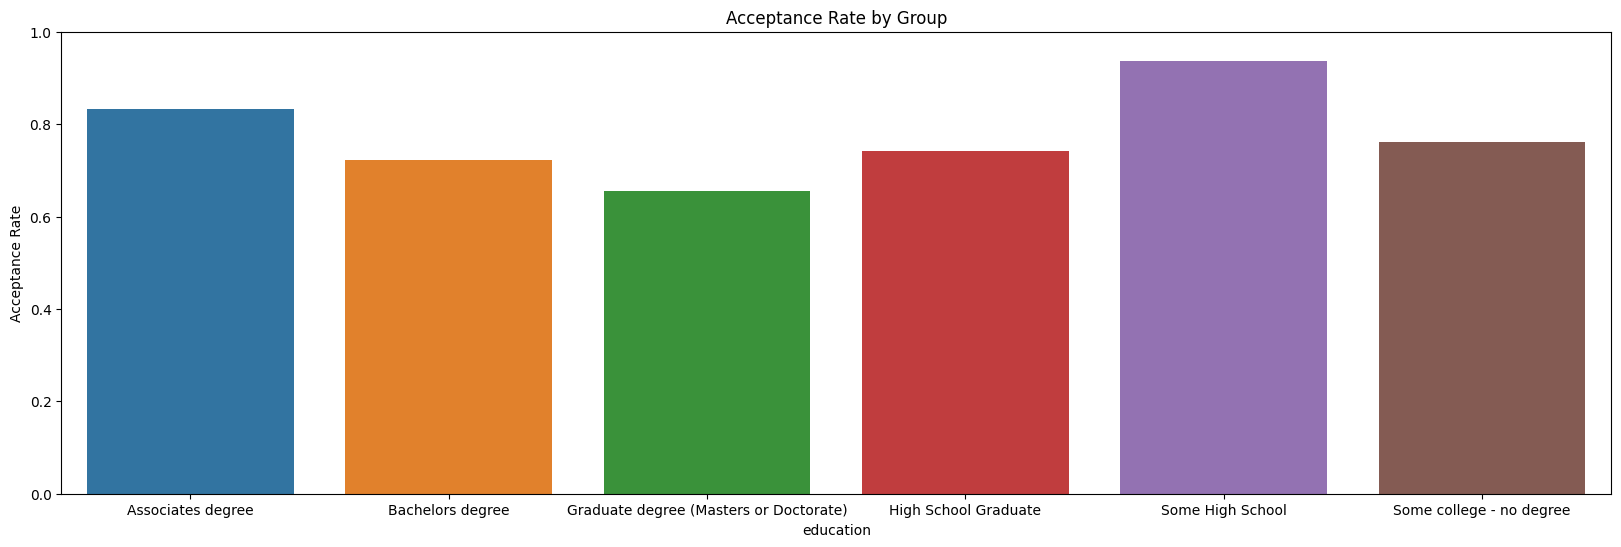

In [20]:
plt.figure(figsize=(20, 6))
grouper = take_out_only.groupby(['education'])[['Y']].mean().reset_index()
sns.barplot(x='education', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I saw even better groupings across those invovled in associates degrees, some high school, and soem college - no degree, so I combined the groupigns here with time above. From there I decided to work on the next group, which I focused more on weather:

(0.0, 1.0)

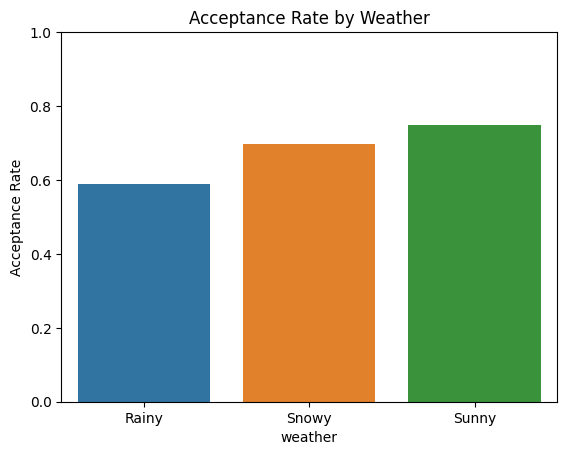

In [21]:
def group_a_checker(x):
    if (x["time"] in ["2PM", "6PM", "10PM"]) & (
        x["education"] in ["Associate Degree", "Some High School", "Some college - no degree"]):
        return "A"
    else:
        return "B"

take_out_only['group'] = take_out_only.apply(group_a_checker, axis=1)
grouper = take_out_only[take_out_only['group'] == 'B'].groupby(['weather'])[['Y']].mean().reset_index()
sns.barplot(x='weather', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Weather")
plt.ylim(0, 1)

There were higher acceptances rates on Snowy and Sunny weather as well as lower acceptance rates for rainy weather, so I focused my next group split here. I also filtered on temperature at 55 degrees since this was where the weather fell upon interesting interesting the most for the previous grouping:

(0.0, 1.0)

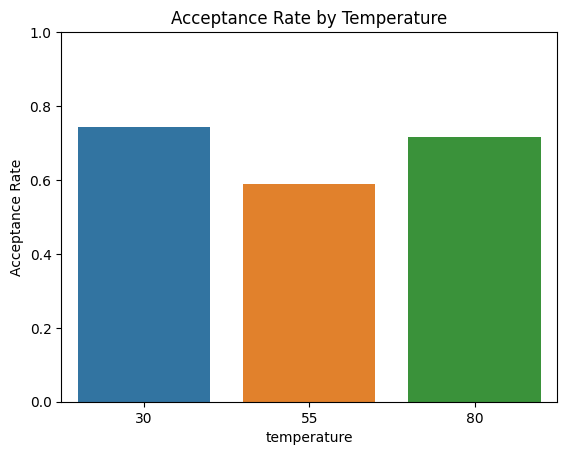

In [22]:
def group_a_checker(x):
    if (x["time"] in ["2PM", "6PM", "10PM"]) & (
        x["education"] in ["Associate Degree", "Some High School", "Some college - no degree"]):
        return "A"
    elif (x["weather"] in ["Sunny", "Snowy"]) & (
    x["temperature"] == 55):
        return "B"
    else:
        return "C"

take_out_only['group'] = take_out_only.apply(group_a_checker, axis=1)

grouper = take_out_only[take_out_only['group'] == 'C'].groupby(['temperature'])[['Y']].mean().reset_index()
sns.barplot(x='temperature', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Temperature")
plt.ylim(0, 1)

As we see, after filtering upon weather, the acceptance rate grew lower while the other two were larger. Hence these groups made up the final group splitting. Below is our full group splits:

(0.0, 1.0)

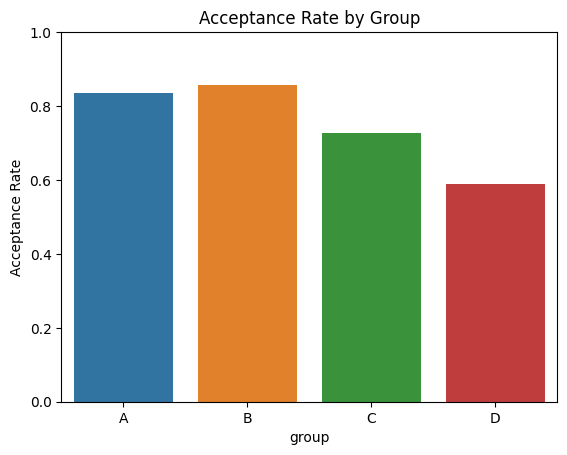

In [23]:
def group_a_checker(x):
    if (x["time"] in ["2PM", "6PM", "10PM"]) & (
        x["education"] in ["Associate Degree", "Some High School", "Some college - no degree"]):
        return "A"
    elif (x["weather"] in ["Sunny", "Snowy"]) & (
    x["temperature"] == 55):
        return "B"
    elif (x["temperature"] in [30, 80]):
        return "C"
    else:
        return "D"

take_out_only['group'] = take_out_only.apply(group_a_checker, axis=1)
grouper = take_out_only.groupby(['group'])[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

#### Final Conclusions:

Overall, it seems the largest factors were time, education, weather, and temperature towards carry out coupon usage. Time and Education were also connected in usage which led to a higher acceptance rate which we see by grouping education in Associate Degree, Some High School, and Some college - no degree with time past 12 pm. Weather also played a factor along with temp where group B focused on snowy and sunny weather with temp of 55 which also led to higher acceptance rates. Finally group C still focused on weather and focused on the other two temperatures, 30 and 80, which gave us a lower acceptance rate for other factors, allowing easier prediction splitting. In the end, this grouping was much harder to predict in comparison to bar coupons since smaller groupings tended to have higher coupon usage and vice versa. The number of carry outs a person did per month also had no major factor in the groupings and predictions (in fact, the highest coupon usage from this category were from those who said they never did carry out per month).

## Exploring Coffee Coupon Usage:


We'll need to split the data on only coffee coupons first:

In [24]:
coffee_only = df[df["coupon"] == "Coffee House"].reset_index(drop=True)
print(coffee_only.shape)
coffee_only.head()

(3816, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
0,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,no
1,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,no
2,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
4,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,no


Let's also get the proportion of coupon usages on this dataset:

In [62]:
coffee_only['Was Coupon Used'].value_counts(normalize=True)

Was Coupon Used
no     0.503669
yes    0.496331
Name: proportion, dtype: float64

First I checked differences based solely on visits to coffee houses per month, since one could assume more frequent visit rates would mean a larger likelihood of using the coupon.

(0.0, 1.0)

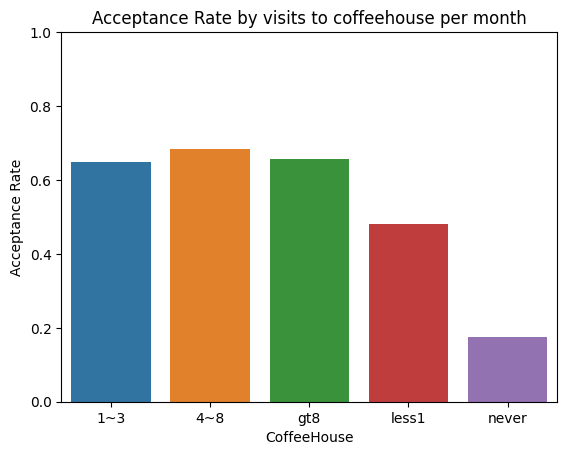

In [25]:
grouper = coffee_only.groupby(['CoffeeHouse'])[['Y']].mean().reset_index()
sns.barplot(x='CoffeeHouse', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by visits to coffeehouse per month")
plt.ylim(0, 1)

Clearly there was a distinct usage drop in people who listed "never" so I decided to mark this as the first group.

Next after group splitting, I looked at time since I considered one might prefer to drink coffee at a specific time (for example more in the morning or midday than at night):

(0.0, 1.0)

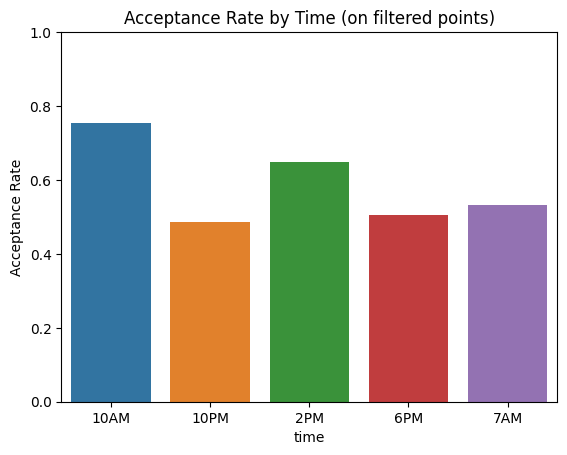

In [26]:
def group_a_checker(x):
    if (x['CoffeeHouse'] == "never"):
        return "A"
    else:
        return "B"
    
coffee_only['group'] = coffee_only.apply(group_a_checker, axis=1)
grouper = coffee_only[coffee_only['group'] == 'B'].groupby(['time'])[['Y']].mean().reset_index()
sns.barplot(x='time', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Time (on filtered points)")
plt.ylim(0, 1)

Times listed under 10 am and 2 pm had high coupon usage rates so I combined both groups together to a single group. Interestingly, these points all listed "no urgent place" for destination as well

For the next grouping, I noticed on the filtered points that points grouped by passengers in the vehicle alone with the coupon expiration time had good splittings as we see below:

(0.0, 1.0)

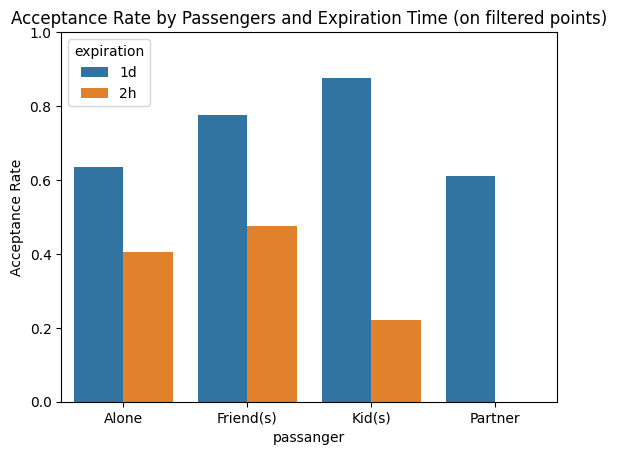

In [27]:
def group_a_checker(x):
    if (x['CoffeeHouse'] == "never"):
        return "A"
    elif (x['time'] in ["10AM", "2PM"]): # No urgent place as well
        return "B"
    else:
        return "C"
    
coffee_only['group'] = coffee_only.apply(group_a_checker, axis=1)
grouper = coffee_only[coffee_only['group'] == 'C'].groupby(['passanger', 'expiration'])[['Y']].mean().reset_index()
sns.barplot(x='passanger', y='Y', data=grouper, hue='expiration')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Passengers and Expiration Time (on filtered points)")
plt.ylim(0, 1)

As you see, the groupings for expiration time of 1d on passengers of Friend(s) or Kids(s) is extremely high! I decided this to be my first group split, but since the expiration time for 2h was also low, I utilized that split for the next threshold as well.

Finally I did one more additional group splitting, this time rexploring coffeehouse but with the factor if the vehicle was in the direction of the coffeehouse for the coupon:

(0.0, 1.0)

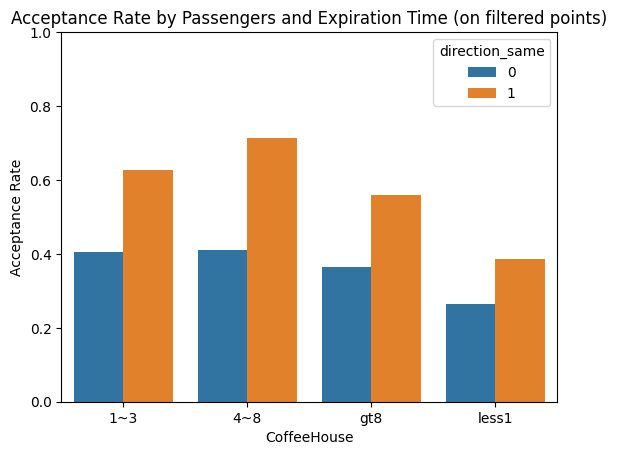

In [28]:
def group_a_checker(x):
    if (x['CoffeeHouse'] == "never"):
        return "A"
    elif (x['time'] in ["10AM", "2PM"]): # No urgent place as well
        return "B"
    elif (x["passanger"] in ["Friend(s)", "Kid(s)"]) & (x["expiration"] == "1d"):
        return "C"
    elif (x["passanger"] in ["Alone", "Friend(s)", "Kid(s)"]) & (x["expiration"] == "2h"):
        return "D"
    else:
        return "E"
    
coffee_only['group'] = coffee_only.apply(group_a_checker, axis=1)
grouper = coffee_only[coffee_only['group'] == 'D'].groupby(['CoffeeHouse', 'direction_same'])[['Y']].mean().reset_index()
sns.barplot(x='CoffeeHouse', y='Y', data=grouper, hue='direction_same')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Passengers and Expiration Time (on filtered points)")
plt.ylim(0, 1)

It seems there's extremely high rates in general if the user's vehicle direction was the same as the coffeehouse and he/she went to a cofeehouse at least once a month! I worked my next split here and also created one for users who went to a coffee house less than once a month and weren't in the same direction. From there I couldn't make anymore major split findings on the final groups and thus ended with the plot below:

(0.0, 1.0)

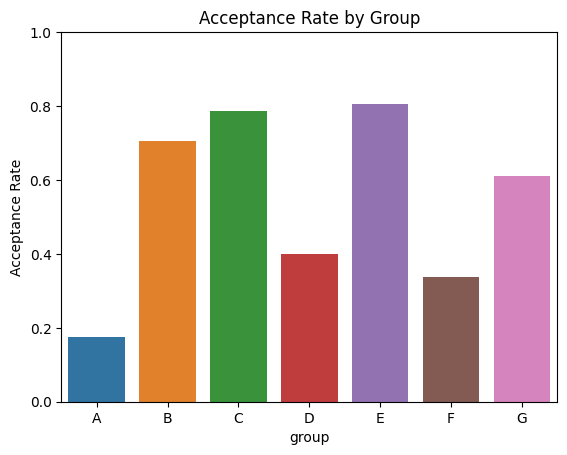

In [29]:
def group_a_checker(x):
    if (x['CoffeeHouse'] == "never"):
        return "A"
    elif (x['time'] in ["10AM", "2PM"]): # No urgent place as well
        return "B"
    elif (x["passanger"] in ["Friend(s)", "Kid(s)"]) & (x["expiration"] == "1d"):
        return "C"
    elif (x["passanger"] in ["Alone", "Friend(s)", "Kid(s)"]) & (x["expiration"] == "2h"):
        return "D"
    elif (x["CoffeeHouse"] in ["1~3", "4~8", "gt8"]) & (x["direction_same"] == 1):
        return "E"
    elif (x["CoffeeHouse"] == "less1") & (x["direction_same"] == 0):
        return "F"
    else:
        return "G"
# kids 0.37

coffee_only['group'] = coffee_only.apply(group_a_checker, axis=1)
grouper = coffee_only.groupby(['group'])[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

#### Final Conclusions

Overall, it seems the biggest factors for coupon usage prediction ended up being visits per month to a coffee house and time which were to be expected. Other factors that were still relevant but not as expected however were if there were any passengers in the car, the expiration date of the coupon and the vehicle direction being the same as the coffee house location. The latter two made sense but for the latter it seemed passengers were both effective in making users stop and not stopto use a coupon for coffee. Overall, quite interesting result split on groups, we had visits per coffee house being effective immediately, time coming in next in importance, followed by the groupings of passenger and expiration time before finally a return with coffeehouse visits with help by direction being the same or not.

## Exploring coupons on 20 dollars or less restaurants

As per usual, we split the data on the coupons we're researching:

In [30]:
restaurant20_only = df[df["coupon"] == "Restaurant(<20)"].reset_index(drop=True)
print(restaurant20_only.shape)
restaurant20_only.head()

(2653, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,yes
1,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,1,yes
2,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,1,yes
3,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,yes
4,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,1,yes


We'll also get the proportion rates of coupon used or not:

In [65]:
restaurant20_only['Was Coupon Used'].value_counts(normalize=True)

Was Coupon Used
yes    0.709009
no     0.290991
Name: proportion, dtype: float64

First I decided to check on expiration and destination, which lead me to discover a large possible acceptance rate grouping I could split on in "1d" and "No Urgent Place":

(0.0, 1.0)

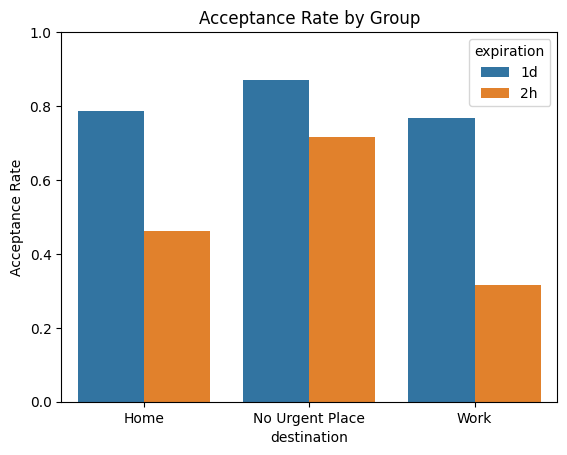

In [31]:
grouper = restaurant20_only.groupby(['expiration', 'destination'])[['Y']].mean().reset_index()
sns.barplot(x='destination', y='Y', data=grouper, hue="expiration")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

Continuing to pay attention on the "No Urgent Place" variable under the destination column, I saw another large split with income at 25k - 37499 in dollars to utilize upon:

(0.0, 1.0)

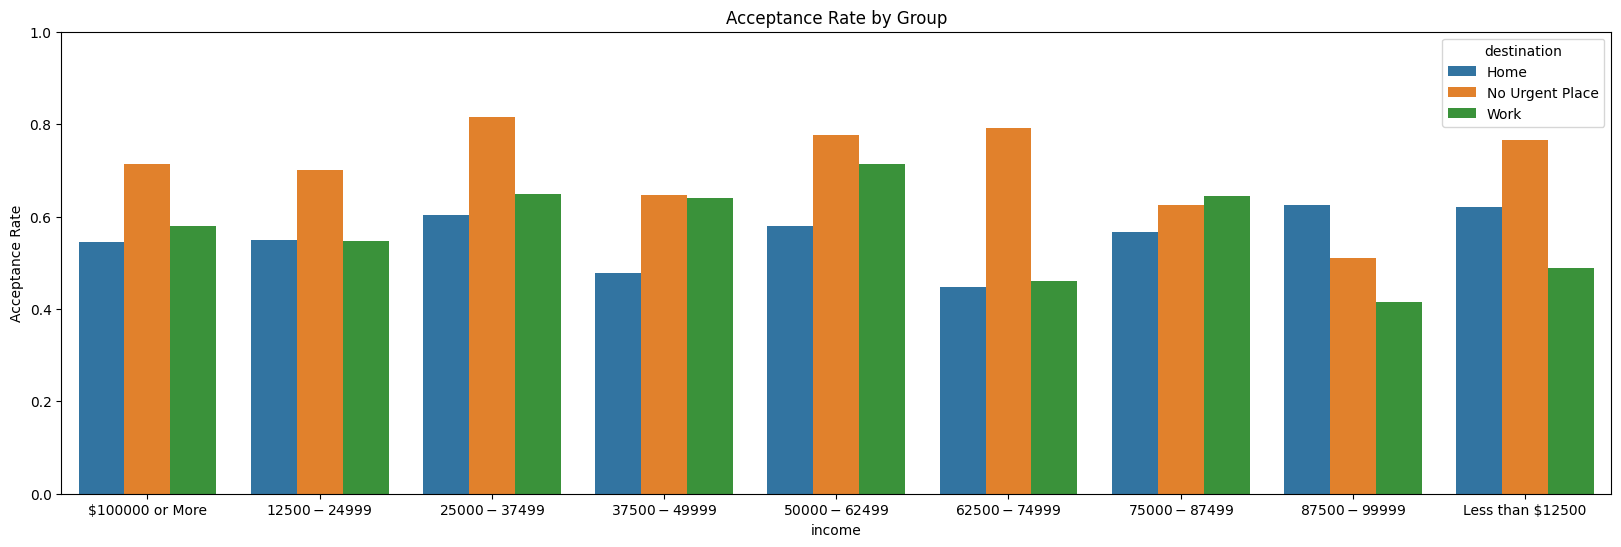

In [32]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    else:
        return "B"
    
plt.figure(figsize=(20, 6))
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'B'].groupby(['income', 'destination'])[['Y']].mean().reset_index()
sns.barplot(x='income', y='Y', data=grouper, hue='destination')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

Next I explored weather and passengers in the vehicle which let me find a grouping which led to a smaller rate of acceptance, weather being rainy and snowy along with no passengers. The weather were combined together since they were both low when no passengers:

(0.0, 1.0)

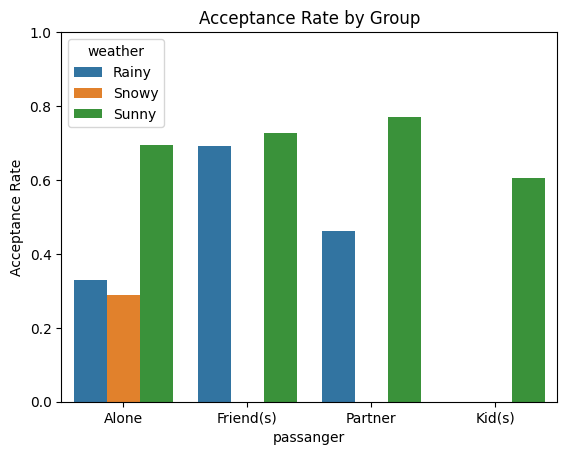

In [33]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    else:
        return "C"
    
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'C'].groupby(['weather', 'passanger'])[['Y']].mean().reset_index()
sns.barplot(x='passanger', y='Y', data=grouper, hue='weather')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

On the remaining points, I then explored destination with marital status. Grouping destination of "Home" and "No Urgent Place" with marital status of "divorced" or "widowed" gave low acceptance rates for larger groups, thus I made my next split there:

(0.0, 1.0)

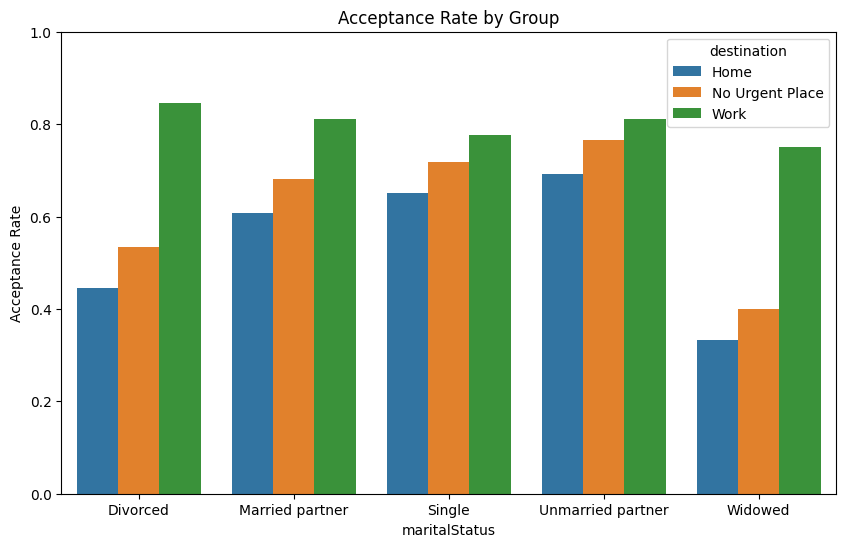

In [34]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    else:
        return "D"
    
plt.figure(figsize=(10, 6))
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'D'].groupby(['destination', 'maritalStatus'])[['Y']].mean().reset_index()
sns.barplot(x='maritalStatus', y='Y', data=grouper, hue='destination')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

The next split discovered occurred on the weather ocne again, this time with the weather being sunny, along with the time being either 6 PM or 7 AM. A high acceptance rate were found with these groupings and as such I made a split here:

(0.0, 1.0)

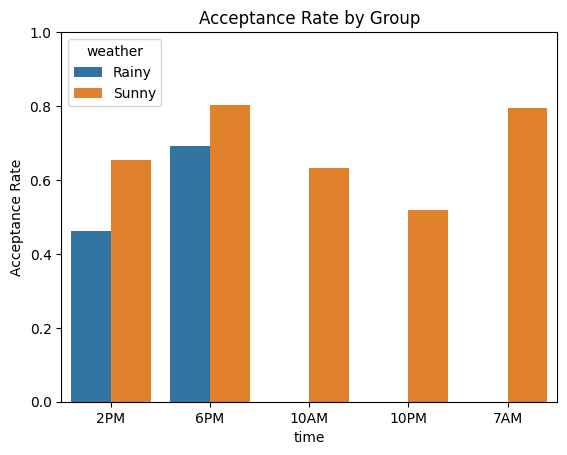

In [35]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    elif (x['destination'] in ["Home", "No Urgent Place"]) & (x["maritalStatus"] in ["Divorced", "Widowed"]):
        return "D"
    else:
        return "E"
    
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'E'].groupby(['weather', 'time'])[['Y']].mean().reset_index()
sns.barplot(x='time', y='Y', data=grouper, hue='weather')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

At this point, income started showing splits for groups with low acceptance rates, which I decided to focus upon. I first focused on a split that worked with destination again followed by another that worked on only income:

(0.0, 1.0)

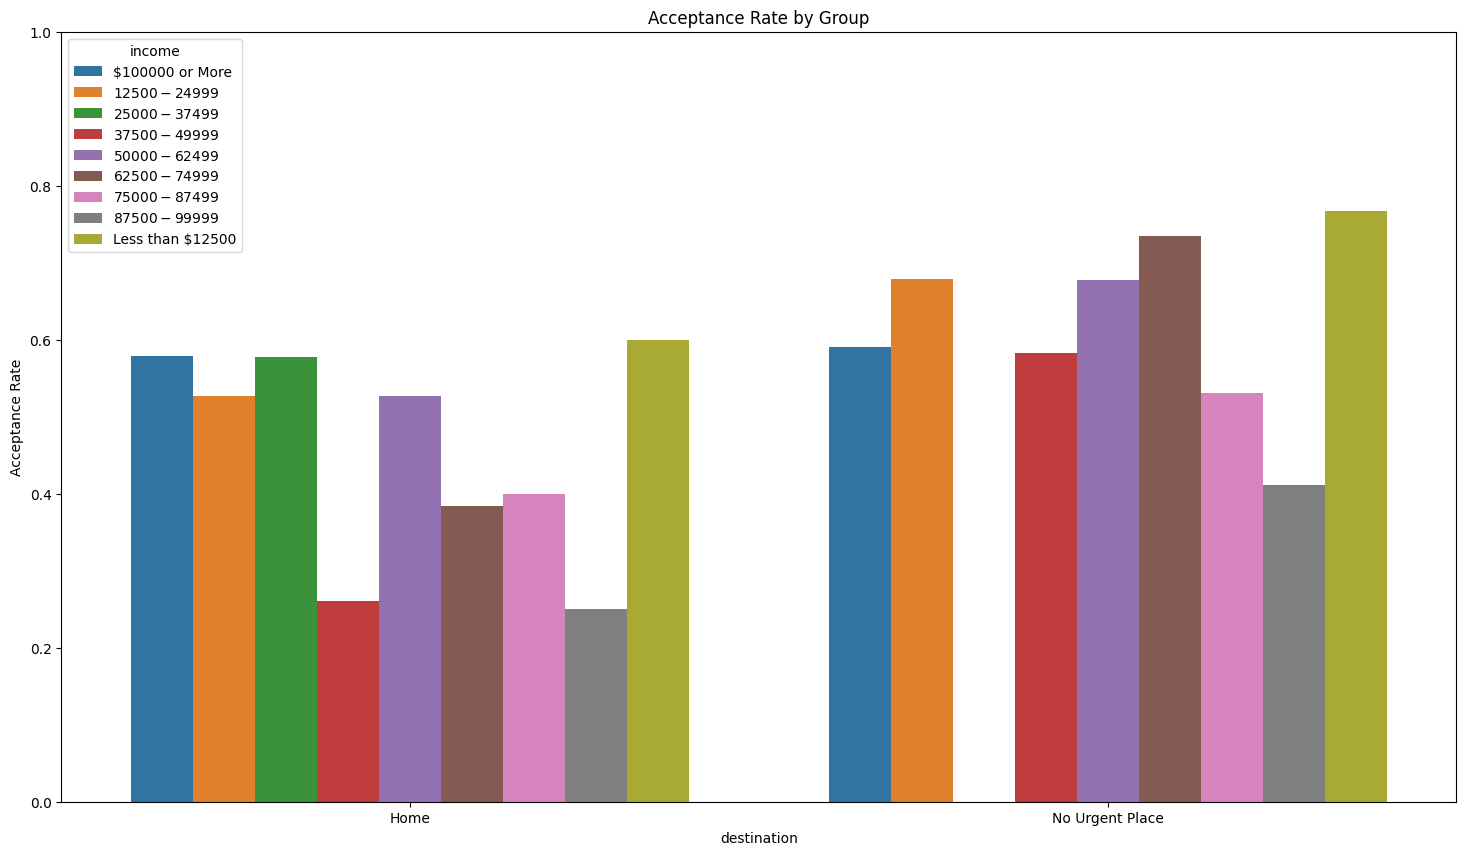

In [36]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    elif (x['destination'] in ["Home", "No Urgent Place"]) & (x["maritalStatus"] in ["Divorced", "Widowed"]):
        return "D"
    elif (x['weather'] == "Sunny") & (x["time"] in ["6PM", "7AM"]):
        return "E"
    else:
        return "F"
    
plt.figure(figsize=(18, 10))
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'F'].groupby(['income', 'destination'])[['Y']].mean().reset_index()
sns.barplot(x='destination', y='Y', data=grouper, hue='income')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

(0.0, 1.0)

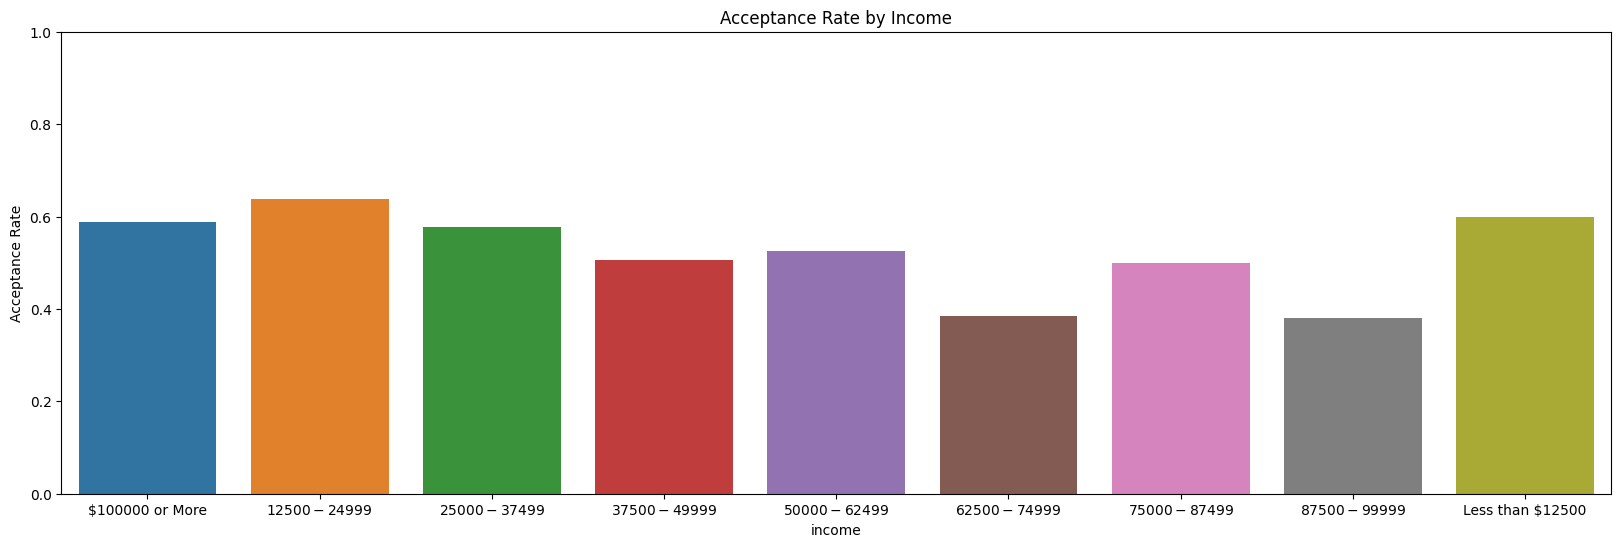

In [37]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    elif (x['destination'] in ["Home", "No Urgent Place"]) & (x["maritalStatus"] in ["Divorced", "Widowed"]):
        return "D"
    elif (x['weather'] == "Sunny") & (x["time"] in ["6PM", "7AM"]):
        return "E"
    elif (x['destination'] == "No Urgent Place") & (x["income"] in ['Less than $12500', '$62500 - $74999', '$50000 - $62499']):
        return "F"
    else:
        return "G"
    
plt.figure(figsize=(20, 6))
restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'G'].groupby(['income'])[['Y']].mean().reset_index()
sns.barplot(x='income', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Income")
plt.ylim(0, 1)

Finally I did one last check on the bars and interestingly, the monthly visits to bars ended up being a good group splitting factor as well:

(0.0, 1.0)

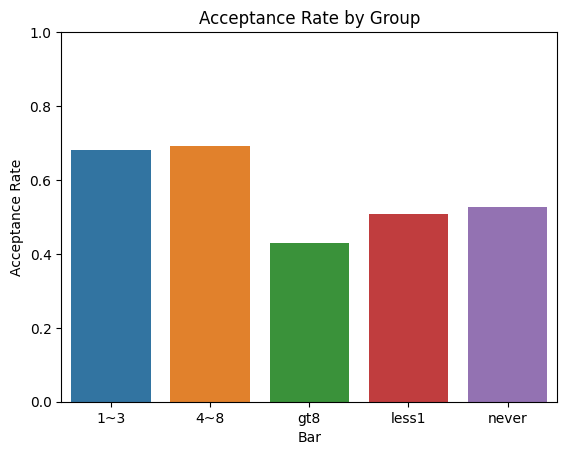

In [38]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    elif (x['destination'] in ["Home", "No Urgent Place"]) & (x["maritalStatus"] in ["Divorced", "Widowed"]):
        return "D"
    elif (x['weather'] == "Sunny") & (x["time"] in ["6PM", "7AM"]):
        return "E"
    elif (x['destination'] == "No Urgent Place") & (x["income"] in ['Less than $12500', '$62500 - $74999', '$50000 - $62499']):
        return "F"
    elif (x['income'] in ['$62500 - $74999', '$87500 - $99999']):
        return "G"
    else:
        return "H"

restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only[restaurant20_only['group'] == 'H'].groupby(['Bar'])[['Y']].mean().reset_index()
sns.barplot(x='Bar', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I couldn't find anymore good splits past this points so these were the final groups I discovered had good group splittings for higher and lower coupon acceptance rates:

(0.0, 1.0)

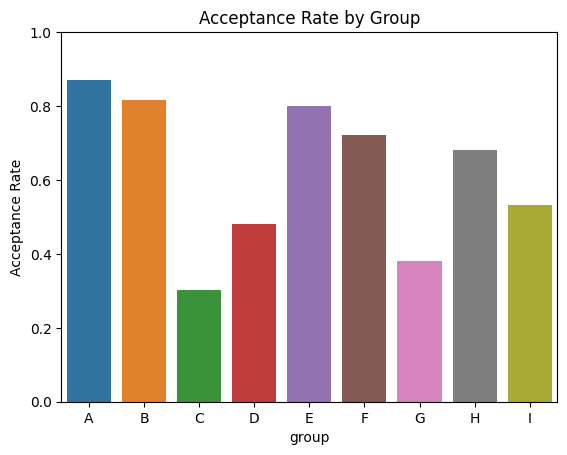

In [39]:
def group_a_checker(x):
    if (x['expiration'] == '1d') & (x['destination'] == 'No Urgent Place'):
        return "A"
    elif (x['income'] == '$25000 - $37499') & (x['destination'] == 'No Urgent Place'):
        return "B"
    elif (x["weather"] in ["Rainy", "Snowy"]) & (x['passanger'] == "Alone"):
        return "C"
    elif (x['destination'] in ["Home", "No Urgent Place"]) & (x["maritalStatus"] in ["Divorced", "Widowed"]):
        return "D"
    elif (x['weather'] == "Sunny") & (x["time"] in ["6PM", "7AM"]):
        return "E"
    elif (x['destination'] == "No Urgent Place") & (x["income"] in ['Less than $12500', '$62500 - $74999', '$50000 - $62499']):
        return "F"
    elif (x['income'] in ['$62500 - $74999', '$87500 - $99999']):
        return "G"
    elif (x['Bar'] in ['1~3', '4-8']):
        return "H"
    else:
        return "I"

restaurant20_only['group'] = restaurant20_only.apply(group_a_checker, axis=1)
grouper = restaurant20_only.groupby(['group'])[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

#### Final Conclusions

The biggest factor that played a part in predicting the less than 20$ restaurant coupon seems to be destination, particularly "No Urgent Place" since it created a influence on higher coupon usage rates. From there income and weather also seemed influential on higher rates with different income ranges and the sunny weather all palying a role towards higher rates, though there weren't any discenerable patterns across the income values. The other respective weathers were also useful in predicting lower income rates (which we see in group C). Finally we had time, coupon expiration date, passenger, time, and monthly bar visits playing a minor but still important part as well; with time, expiration date, time, and monthly bar visits helping to predict higher coupon usage rates and passenger (specifically "Alone" or no passengers) helping predict lower coupon usage rates.

## Exploring coupons on 20 to 50 dollar restaurants

Once again, we'll split the data on the final group coupon in specific:

In [40]:
restaurant20_50_only = df[df['coupon'] == 'Restaurant(20-50)']
print(restaurant20_50_only.shape)
restaurant20_50_only.head()

(1417, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Was Coupon Used
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,no
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,no
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,no
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1,1,0,0,1,0,no


We'll also get the proportion rates of coupon used or not:

In [66]:
restaurant20_50_only['Was Coupon Used'].value_counts(normalize=True)

Was Coupon Used
no     0.553987
yes    0.446013
Name: proportion, dtype: float64

The first thing I did was see if there were any easy splits on just the monthly visists to a 20-50$ restaurant since more freqeuent visits would mean more likelihood if usage for this specific ticket in theory:

(0.0, 1.0)

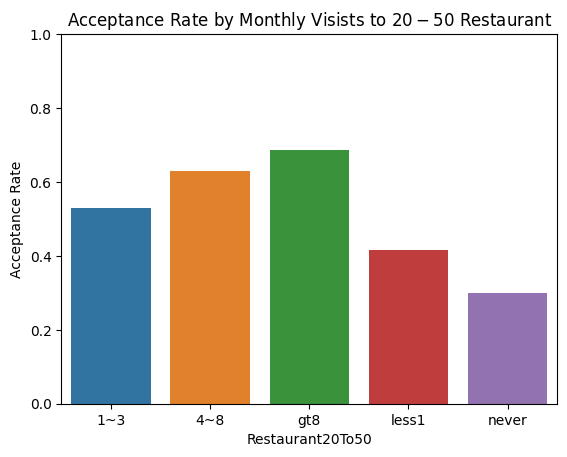

In [41]:

grouper = restaurant20_50_only.groupby(['Restaurant20To50'])[['Y']].mean().reset_index()
sns.barplot(x='Restaurant20To50', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Monthly Visits to $20-$50 Restaurant")
plt.ylim(0, 1)

As we see, people who fall under "never" here already have a low usage rate so I decided to work my first split here. "gt8" also had high usage so this was another group split:

Next I decided to explore on passenger during the trip and the time of the trip:

(0.0, 1.0)

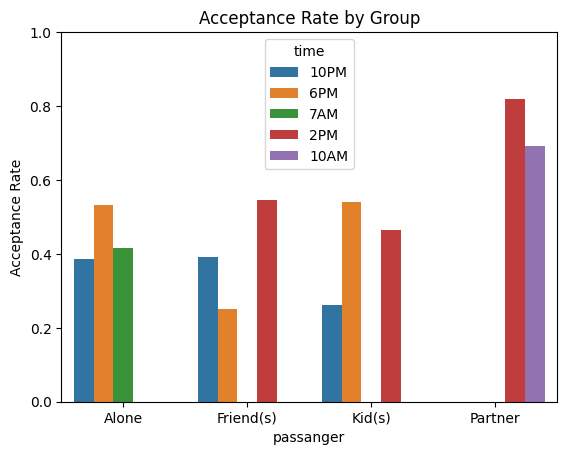

In [120]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    else:
        return "C"

    
    
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'C'].groupby(['passanger', 'time'])[['Y']].mean().reset_index()
sns.barplot(x='passanger', y='Y', data=grouper, hue='time')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I saw that if the the passenger was a kid/multiple kids and the time was 10 pm, the rate was significantly low, so I decided my next split there. Note Friends at 6 pm also had a low rate but the number of points this group encapsulated was only 4 vs the 91 points captured with kids and 10 pm so the latter group was not utilized.

For the next split, I kept weather but looked at destination instead of passenger:

(0.0, 1.0)

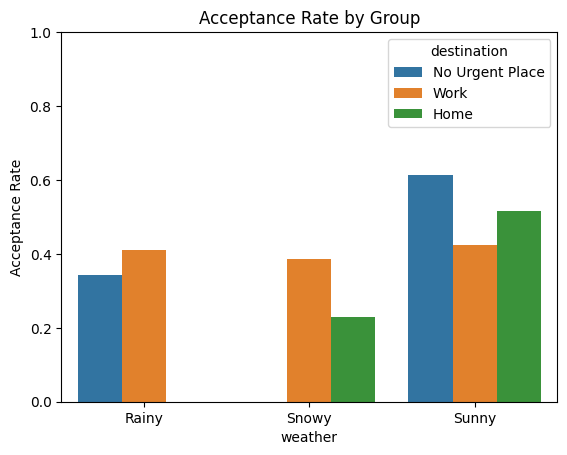

In [121]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    else:
        return "D"

    
    
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'D'].groupby(['weather', 'destination'])[['Y']].mean().reset_index()
sns.barplot(x='weather', y='Y', data=grouper, hue='destination')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

Particularly the group combination of snowy weather and destination of home lead to a low coupon usage rating so I used that as my next group split.

Next I explored the passenger and the expiration date of this coupon:

(0.0, 1.0)

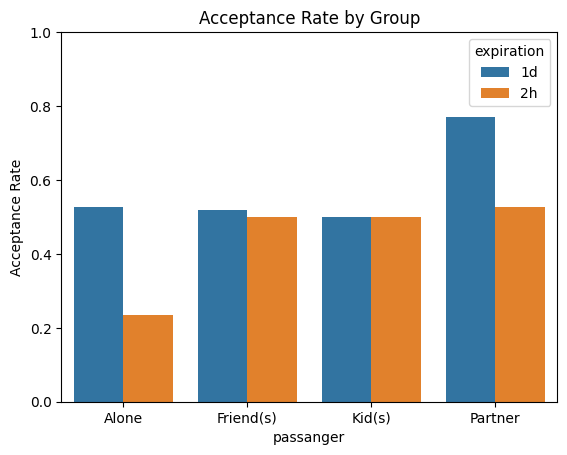

In [122]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    elif (x['weather'] == 'Snowy') & (x['destination'] == 'Home'):
        return "D"
    else:
        return "E"
    

restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'E'].groupby(['passanger', 'expiration'])[['Y']].mean().reset_index()
sns.barplot(x='passanger', y='Y', data=grouper, hue='expiration')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I discovered a high and low acceptance rate here between two groups. Having no passengers and the expiration time being 2 hours led to low coupon usage while having a partner and expiration time being 1 day led to high coupon usage. Thus, I splitted the data on both these groups.

Continuing the exploration on expiration date, I also looked into income as well:

(0.0, 1.0)

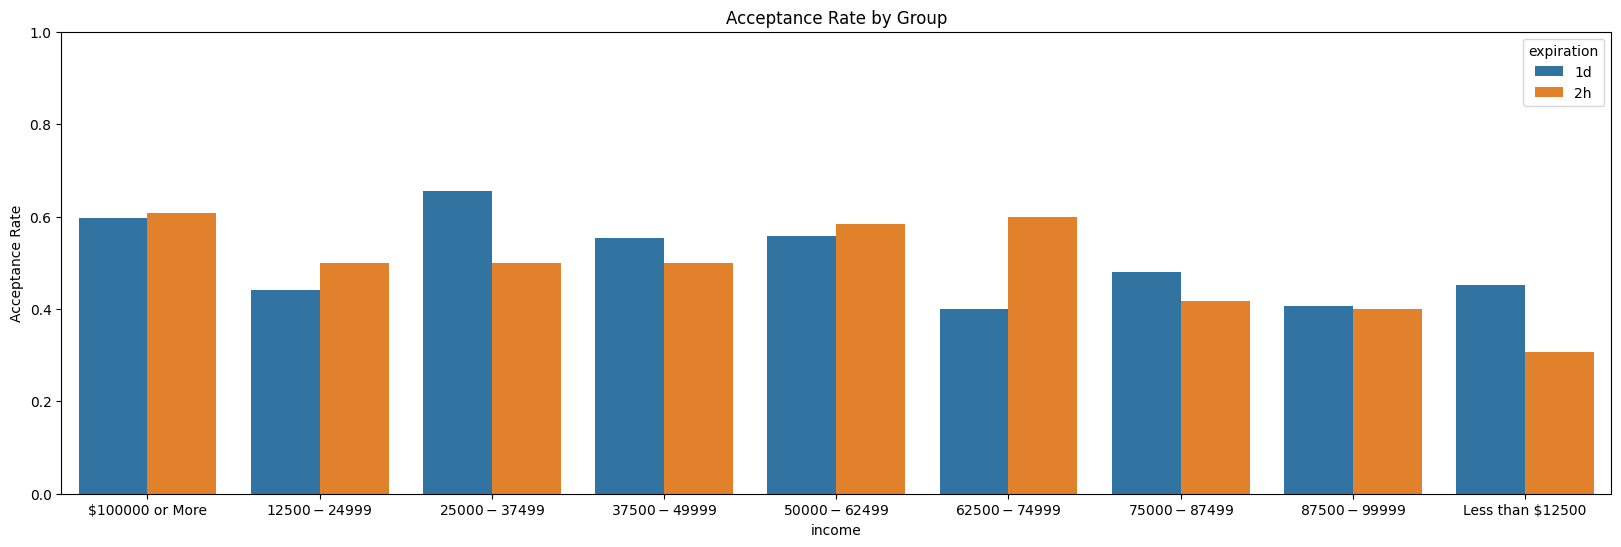

In [123]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    elif (x['weather'] == 'Snowy') & (x['destination'] == 'Home'):
        return "D"
    elif (x['expiration'] == '2h') & (x['passanger'] == 'Alone'):
        return "E"
    elif (x['expiration'] == '1d') & (x['passanger'] == 'Partner'):
        return "F"
    else:
        return "G"

    
plt.figure(figsize=(20, 6))    
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'G'].groupby(['income', 'expiration'])[['Y']].mean().reset_index()
sns.barplot(x='income', y='Y', data=grouper, hue='expiration')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I saw lower acceptance rates in incomes at '87500 - 99999' dollars, 'Less than 12500' dollars and '75000 - 87499' dollars under expiration dates of 2 hours, so I decided to combine them into one group.

I decided to refocus on monthly visits to a 20 to 50 dollar restaurant along with an extra factor in weather:

(0.0, 1.0)

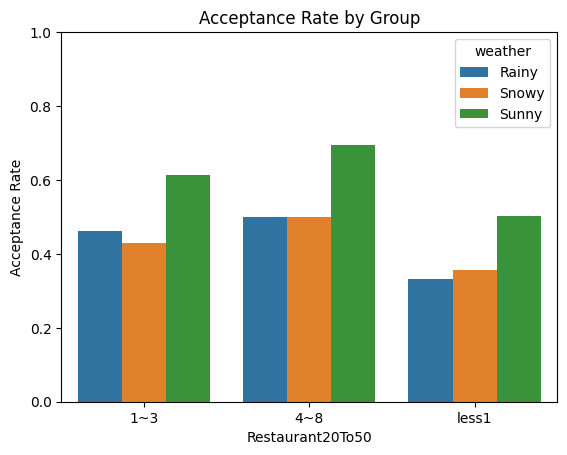

In [128]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    elif (x['weather'] == 'Snowy') & (x['destination'] == 'Home'):
        return "D"
    elif (x['expiration'] == '2h') & (x['passanger'] == 'Alone'):
        return "E"
    elif (x['expiration'] == '1d') & (x['passanger'] == 'Partner'):
        return "F"
    elif (x['expiration'] == '2h') & (x['income'] in ['Less than $12500', '$87500 - $99999', '$75000 - $87499']):
        return "G"
    else:
        return "H"

    
    
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'H'].groupby(['Restaurant20To50', 'weather'])[['Y']].mean().reset_index()
sns.barplot(x='Restaurant20To50', y='Y', data=grouper, hue='weather')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I noticed a lower rate under those who went less than once a month under snowy and rainy weather and focused my group split there.

Next I kept monthly visists but changed weather to age and noticed another split less than 1 visits, this time with those age 21 and 50plus having low acceptance rates:

(0.0, 1.0)

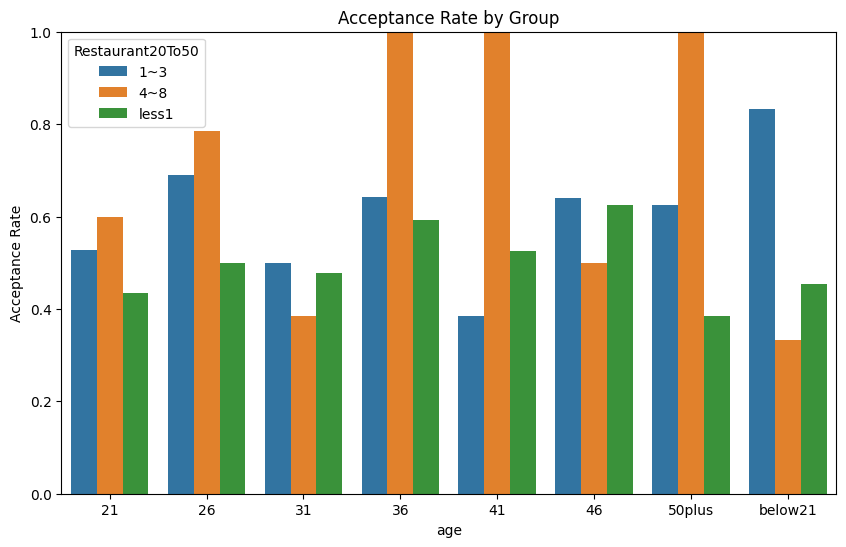

In [145]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    elif (x['weather'] == 'Snowy') & (x['destination'] == 'Home'):
        return "D"
    elif (x['expiration'] == '2h') & (x['passanger'] == 'Alone'):
        return "E"
    elif (x['expiration'] == '1d') & (x['passanger'] == 'Partner'):
        return "F"
    elif (x['expiration'] == '2h') & (x['income'] in ['Less than $12500', '$87500 - $99999', '$75000 - $87499']):
        return "G"
    elif (x['Restaurant20To50'] == 'less1') & (x['Restaurant20To50'] in ['Rainy', 'Snowy']):
        return "H"
    else:
        return "I"

    
plt.figure(figsize=(10, 6))
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only[restaurant20_50_only['group'] == 'I'].groupby(['Restaurant20To50', 'age'])[['Y']].mean().reset_index()
sns.barplot(x='age', y='Y', data=grouper, hue='Restaurant20To50')
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

I decided to stop here since too many groups were forming along with the fact that the variables were having less affect improving the leftover points' acceptance rates:

(0.0, 1.0)

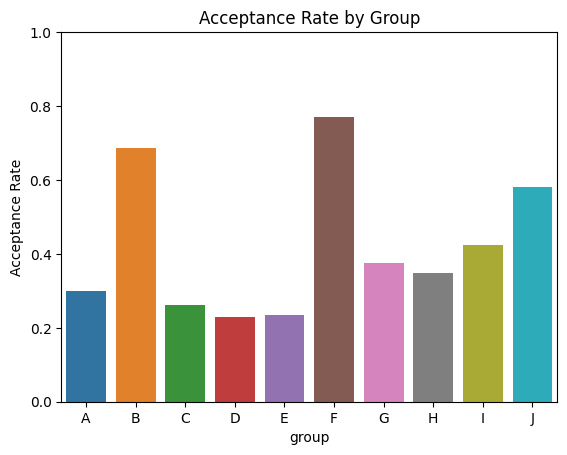

In [152]:
def group_a_checker(x):
    if (x['Restaurant20To50'] == 'never'):
        return "A"
    elif (x['Restaurant20To50'] == 'gt8'):
        return "B"
    elif (x['passanger'] == 'Kid(s)') & (x['time'] in ['10PM']):
        return "C"
    elif (x['weather'] == 'Snowy') & (x['destination'] == 'Home'):
        return "D"
    elif (x['expiration'] == '2h') & (x['passanger'] == 'Alone'):
        return "E"
    elif (x['expiration'] == '1d') & (x['passanger'] == 'Partner'):
        return "F"
    elif (x['expiration'] == '2h') & (x['income'] in ['Less than $12500', '$87500 - $99999', '$75000 - $87499']):
        return "G"
    elif (x['Restaurant20To50'] == 'less1') & (x['weather'] in ['Rainy', 'Snowy']):
        return "H"
    elif (x['Restaurant20To50'] == 'less1') & (x['age'] in ['21', '50plus']):
        return "I"
    else:
        return "J"

    
    
restaurant20_50_only['group'] = restaurant20_50_only.apply(group_a_checker, axis=1)
grouper = restaurant20_50_only.groupby(['group'])[['Y']].mean().reset_index()
sns.barplot(x='group', y='Y', data=grouper)
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Group")
plt.ylim(0, 1)

#### Final Conclusions

Interesting there were much less factors that influenced the customers towards using the coupon. The biggest factor seemed to be when the customer had a passenger with them with the coupon expiration being in one day or if the the customer frequently went to these restaurants more than 8 times a month. Meanwhile we have multiple factors leading to no coupon usage such as monthly visits to related restaurants being never, have kids as passengers at late night (10 PM), snowy weather with a trip destination of home, less than one visits to these restaurants under snowy/rainy weather or if the customer 21 or 51 plus, and much more. It seems that the higher quality of the restaurant also boosted the number of factors that might dissuade a customer to use such a coupon. Overall, definitely the hardest group to explore.

## Finishing Thoughts and Next Steps

In the end, most of the results we found here do make sense with respect to what coupon we researched upon. For instance, the Bar and Coffee coupons were the easiest to research as they connected to expected variables such as freqeunt monthly visits to a bar/coffeehouse. The most difficult to research was certainly the 20 to 50 restaurant coupons since a lot of factors didn't mesh well and would only really help with predicting no coupon usage. In the end we still had a lot of left over points despite so many group splittings. There were also definitely some unexpected contributing variables, like frequent bar visits helping to predict 20 or less restaurant coupon usage. Now that we discovered the factors we believe to be helpful for prediction, our next step would be crating a model to see just how accurate we can get towards truly predicting these coupon usages correctly, along with seeing just how useful our predicting variables really are.